In [1]:
# import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 1000)

In [3]:
# loc and iloc are called indexers
# Lets show how they work and how they differ from each other

df = pd.read_excel("Sales Data.xlsx")
df

,Sales Person,Geography,Product,Date,Amount,Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01,8414,495
1,Dennison Crosswaite,Canada,White Choc,2021-01-01,532,54
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376,269
3,Barr Faughny,New Zealand,Baker's Choco Chips,2021-01-01,259,22
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01,5530,179
...,...,...,...,...,...,...
3786,Van Tuxwell,India,Drinking Coco,2022-01-19,10682,1526
3787,Rafaelita Blaksland,Australia,Mint Chip Choco,2022-01-18,11746,511
3788,Kelci Walkden,Australia,Spicy Special Slims,2022-01-03,8862,1477
3789,Gunar Cockshoot,New Zealand,Mint Chip Choco,2022-01-21,11592,527


In [4]:
df.isnull().sum()

Sales Person    0
Geography       0
Product         0
Date            0
Amount          0
Boxes           0
dtype: int64

In [5]:
df.shape

(3791, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sales Person  3791 non-null   object        
 1   Geography     3791 non-null   object        
 2   Product       3791 non-null   object        
 3   Date          3791 non-null   datetime64[ns]
 4   Amount        3791 non-null   int64         
 5   Boxes         3791 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 177.8+ KB


In [7]:
df.describe()

,Date,Amount,Boxes
count,3791,3791.000000,3791.000000
mean,2021-07-24 07:40:22.474281472,5724.537589,354.675284
min,2021-01-01 00:00:00,0.000000,0.000000
25%,2021-04-08 00:00:00,2352.000000,120.500000
50%,2021-07-23 00:00:00,4844.000000,265.000000
75%,2021-11-12 00:00:00,8302.000000,480.000000
max,2022-01-31 00:00:00,23268.000000,3075.000000
std,NaN,4296.484695,335.358698


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Sales Person', 'Geography', 'Product', 'Date', 'Amount', 'Boxes'], dtype='object')

In [10]:
# Renaming just one of the column 
df =df.rename(columns={'Sales Person': 'Sales_Person'})

In [11]:
df.dtypes

Sales_Person            object
Geography               object
Product                 object
Date            datetime64[ns]
Amount                   int64
Boxes                    int64
dtype: object

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
df.dtypes

Sales_Person            object
Geography               object
Product                 object
Date            datetime64[ns]
Amount                   int64
Boxes                    int64
dtype: object

In [14]:
# for loc and iloc, argument 1 is for rows while argument 2 is for columns
# the main purpose of the loc and iloc is for indexing

# Using loc
[0,2,4,6]
df.loc[[0,2,4,6]] # this works with both interger and strings...
# df.loc[[0,2,4,6]] #list of the row I want to separate... double braces...

,Sales_Person,Geography,Product,Date,Amount,Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01,8414,495
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376,269
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01,5530,179
6,Oby Sorrel,UK,Raspberry Choco,2021-01-01,1057,71


In [15]:
# Using iloc
df.iloc[[0,2,4,6]] # this works with only integers

,Sales_Person,Geography,Product,Date,Amount,Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01,8414,495
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376,269
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01,5530,179
6,Oby Sorrel,UK,Raspberry Choco,2021-01-01,1057,71


In [16]:
# Indexing columns... this one is having first arguement for the row and second arguement for the column using column names or strings

df.loc[[0,2,4,6],['Sales_Person','Geography','Product']]

,Sales_Person,Geography,Product
0,Barr Faughny,New Zealand,Raspberry Choco
2,Karlen McCaffrey,USA,99% Dark & Pure
4,Beverie Moffet,USA,Manuka Honey Choco
6,Oby Sorrel,UK,Raspberry Choco


In [17]:
# Indexing columns... this one is having first arguement for the row and the second arguement  for row but takinng the idex number
df.iloc[[0,2,4,6],[0,1,2,3]]

,Sales_Person,Geography,Product,Date
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01
6,Oby Sorrel,UK,Raspberry Choco,2021-01-01


In [18]:
# Slicing using iloc and loc

df.iloc[::]
# df.iloc[:]
# df.iloc[0:-1] # all of this 3 gives the same output in slicing, returninng all of the rows..

,Sales_Person,Geography,Product,Date,Amount,Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01,8414,495
1,Dennison Crosswaite,Canada,White Choc,2021-01-01,532,54
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376,269
3,Barr Faughny,New Zealand,Baker's Choco Chips,2021-01-01,259,22
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01,5530,179
...,...,...,...,...,...,...
3786,Van Tuxwell,India,Drinking Coco,2022-01-19,10682,1526
3787,Rafaelita Blaksland,Australia,Mint Chip Choco,2022-01-18,11746,511
3788,Kelci Walkden,Australia,Spicy Special Slims,2022-01-03,8862,1477
3789,Gunar Cockshoot,New Zealand,Mint Chip Choco,2022-01-21,11592,527


In [19]:
# Using loc...
# df.loc[:] # this does the samething as above.
# df.loc[::]
df.loc[-1:] # this is quite different of that of .iloc[]

,Sales_Person,Geography,Product,Date,Amount,Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01,8414,495
1,Dennison Crosswaite,Canada,White Choc,2021-01-01,532,54
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376,269
3,Barr Faughny,New Zealand,Baker's Choco Chips,2021-01-01,259,22
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01,5530,179
...,...,...,...,...,...,...
3786,Van Tuxwell,India,Drinking Coco,2022-01-19,10682,1526
3787,Rafaelita Blaksland,Australia,Mint Chip Choco,2022-01-18,11746,511
3788,Kelci Walkden,Australia,Spicy Special Slims,2022-01-03,8862,1477
3789,Gunar Cockshoot,New Zealand,Mint Chip Choco,2022-01-21,11592,527


In [20]:
# Lets use loc and iloc to slice columns.
df.loc[0:4,'Sales_Person':'Product'] # Pick from row 0 to 4, and column 1 to 3.

,Sales_Person,Geography,Product
0,Barr Faughny,New Zealand,Raspberry Choco
1,Dennison Crosswaite,Canada,White Choc
2,Karlen McCaffrey,USA,99% Dark & Pure
3,Barr Faughny,New Zealand,Baker's Choco Chips
4,Beverie Moffet,USA,Manuka Honey Choco


In [21]:
# Using iloc for integer or index numbers
df.iloc[0:4,0:4]

,Sales_Person,Geography,Product,Date
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01
1,Dennison Crosswaite,Canada,White Choc,2021-01-01
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01
3,Barr Faughny,New Zealand,Baker's Choco Chips,2021-01-01


In [22]:
df.iloc[0:-1, 1:4]

,Geography,Product,Date
0,New Zealand,Raspberry Choco,2021-01-01
1,Canada,White Choc,2021-01-01
2,USA,99% Dark & Pure,2021-01-01
3,New Zealand,Baker's Choco Chips,2021-01-01
4,USA,Manuka Honey Choco,2021-01-01
...,...,...,...
3785,UK,70% Dark Bites,2022-01-04
3786,India,Drinking Coco,2022-01-19
3787,Australia,Mint Chip Choco,2022-01-18
3788,Australia,Spicy Special Slims,2022-01-03


In [23]:
# lets work with index...using loc and iloc
df.set_index("Geography", inplace = True)

In [24]:
df.head(5)

,Sales_Person,Product,Date,Amount,Boxes
Geography,,,,,
New Zealand,Barr Faughny,Raspberry Choco,2021-01-01,8414,495
Canada,Dennison Crosswaite,White Choc,2021-01-01,532,54
USA,Karlen McCaffrey,99% Dark & Pure,2021-01-01,5376,269
New Zealand,Barr Faughny,Baker's Choco Chips,2021-01-01,259,22
USA,Beverie Moffet,Manuka Honey Choco,2021-01-01,5530,179


In [25]:
df.index

Index(['  New Zealand', '   Canada', '   USA', 'New Zealand', '   USA', '   India', '   UK', '  Australia', '  Australia', 'New Zealand',
       ...
       'New Zealand   ', 'India', 'India ', 'USA ', 'UK  ', 'India ', 'Australia ', 'Australia ', 'New Zealand ', 'USA   '], dtype='object', name='Geography', length=3791)

In [26]:
# list of all the locations or countries where all the customers purchase from
unique_index = df.index.unique().sort_values()
unique_index

Index(['   Australia', '   Canada', '   India', '   New Zealand', '   UK', '   USA', '  Australia', '  Canada', '  India', '  New Zealand', '  UK', '  USA', ' Australia', ' Canada', ' India', ' New Zealand', ' UK', ' USA', 'Australia', 'Australia ', 'Australia  ', 'Australia   ', 'Canada', 'Canada ', 'Canada  ', 'Canada   ', 'India', 'India ', 'India  ', 'India   ', 'New Zealand', 'New Zealand ', 'New Zealand  ', 'New Zealand   ', 'UK', 'UK ', 'UK  ', 'UK   ', 'USA', 'USA ', 'USA  ', 'USA   '], dtype='object', name='Geography')

In [27]:
df.index = df.index.str.strip()

In [28]:
unique_index = df.index.unique().sort_values()
unique_index


Index(['Australia', 'Canada', 'India', 'New Zealand', 'UK', 'USA'], dtype='object', name='Geography')

In [29]:
len(unique_index)

6

In [30]:
df["Product"] = df["Product"].str.replace('99% -Dark & Pure', '99% Dark & Pure')

In [31]:
# top 10 countries or locations where most patronage are recieved...
df.index.value_counts().head()

Geography
New Zealand    647
Canada         643
UK             636
India          629
Australia      627
Name: count, dtype: int64

<Axes: xlabel='Geography'>

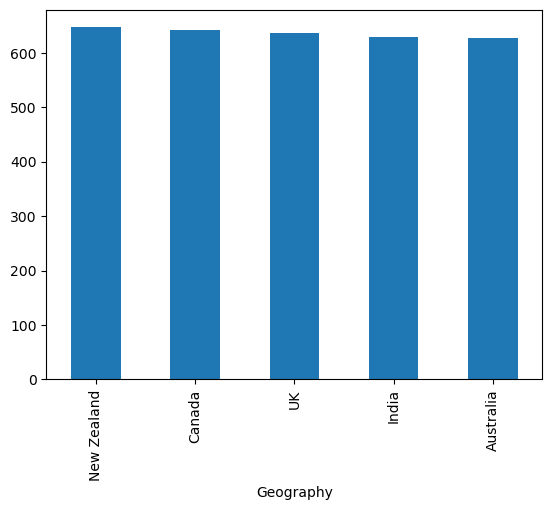

In [32]:
df.index.value_counts().head().plot(kind = 'bar')

<Axes: xlabel='Geography'>

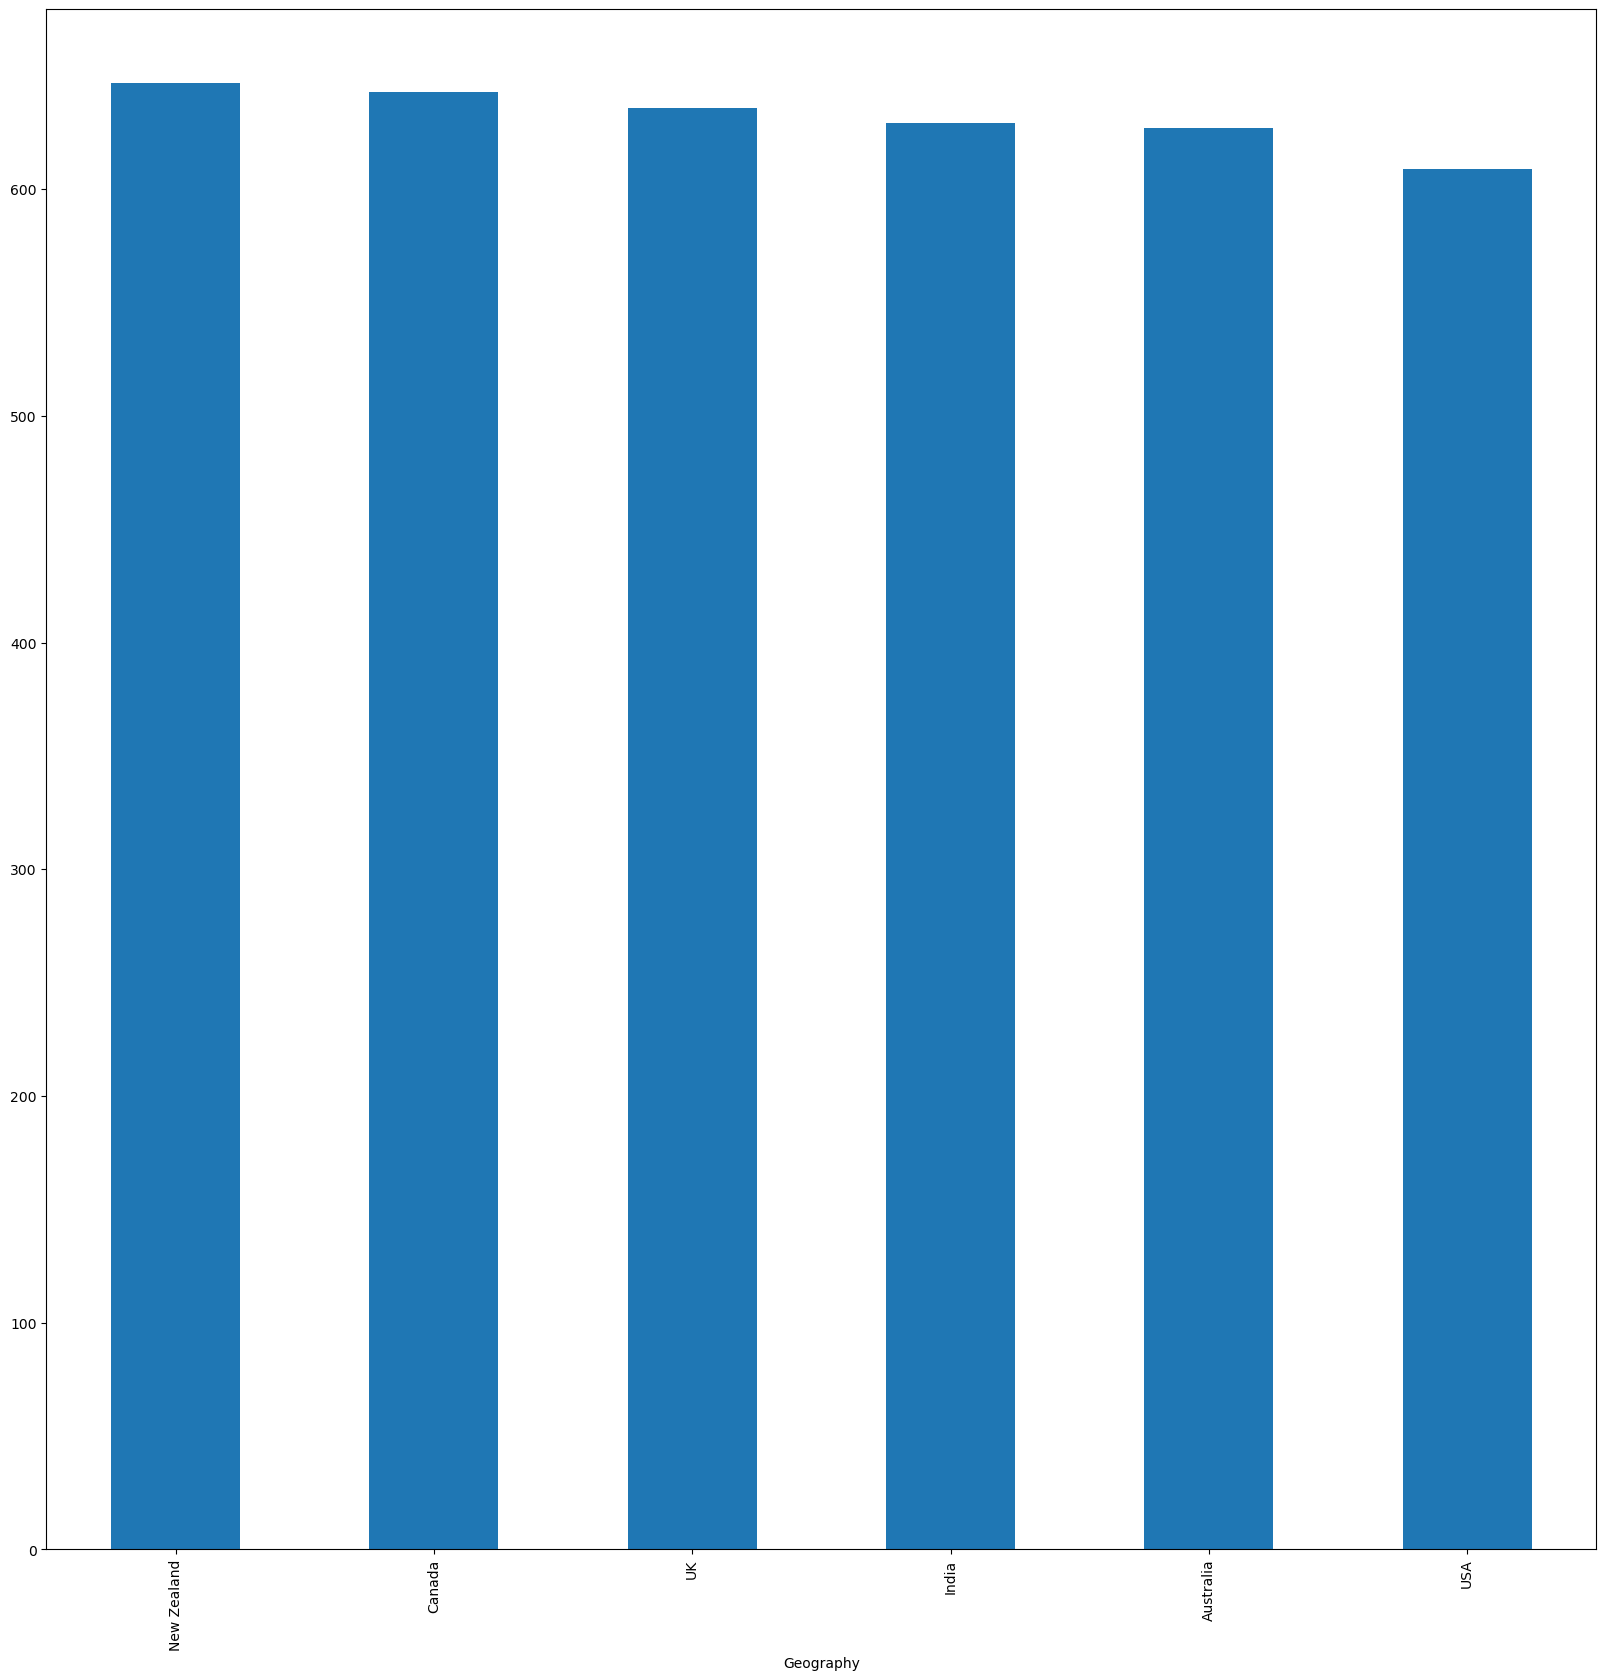

In [33]:
# top 10 countries where most patronage are recieved....
df.index.value_counts().head(100).plot(kind = 'bar',figsize = (20,20))

In [34]:
unique_index.nunique()

6

In [35]:
df.columns

Index(['Sales_Person', 'Product', 'Date', 'Amount', 'Boxes'], dtype='object')

In [36]:
df.loc["India"]

,Sales_Person,Product,Date,Amount,Boxes
Geography,,,,,
India,Rafaelita Blaksland,85% Dark Bars,2021-01-01,2184,122
India,Brien Boise,Eclairs,2021-01-01,15596,975
India,Curtice Advani,After Nines,2021-01-01,8561,330
India,Van Tuxwell,Organic Choco Syrup,2021-01-05,17248,664
India,Jan Morforth,Orange Choco,2021-01-05,3059,279
India,Wilone O'Kielt,Smooth Sliky Salty,2021-01-06,644,34
India,Ches Bonnell,After Nines,2021-01-06,4935,171
India,Madelene Upcott,Manuka Honey Choco,2021-01-07,11228,388
India,Dennison Crosswaite,Mint Chip Choco,2021-01-08,2814,149


In [37]:
df.iloc[0:5]

,Sales_Person,Product,Date,Amount,Boxes
Geography,,,,,
New Zealand,Barr Faughny,Raspberry Choco,2021-01-01,8414,495
Canada,Dennison Crosswaite,White Choc,2021-01-01,532,54
USA,Karlen McCaffrey,99% Dark & Pure,2021-01-01,5376,269
New Zealand,Barr Faughny,Baker's Choco Chips,2021-01-01,259,22
USA,Beverie Moffet,Manuka Honey Choco,2021-01-01,5530,179


In [38]:
# Filtering/ Masking...
# Using Booleans "AND" & "OR"
# AND in pandas is written as "&"
# OR in pandas is written as "|"
#-------------------------------------------------#

In [39]:
Total_Amount = df['Amount'].sum()
Total_Amount

21701722

In [40]:
Total_Boxes = df['Boxes'].sum()
Total_Boxes

1344574

In [41]:
# Amount_per_Box = df[Total_Amount / Total_Boxes]
# Amount_per_Box

In [42]:
# Filtering
df[df["Sales_Person"] == "Barr Faughny"]

,Sales_Person,Product,Date,Amount,Boxes
Geography,,,,,
New Zealand,Barr Faughny,Raspberry Choco,2021-01-01,8414,495
New Zealand,Barr Faughny,Baker's Choco Chips,2021-01-01,259,22
Australia,Barr Faughny,Milk Bars,2021-01-11,7238,315
Canada,Barr Faughny,70% Dark Bites,2021-01-12,490,35
USA,Barr Faughny,White Choc,2021-01-18,2331,167
USA,Barr Faughny,Orange Choco,2021-01-22,13146,1644
New Zealand,Barr Faughny,Mint Chip Choco,2021-01-25,3143,210
New Zealand,Barr Faughny,Eclairs,2021-01-26,9485,527
USA,Barr Faughny,Milk Bars,2021-01-27,5558,192


In [43]:
# Total numbers of customers
df["Sales_Person"].nunique()

26

<Axes: xlabel='Sales_Person'>

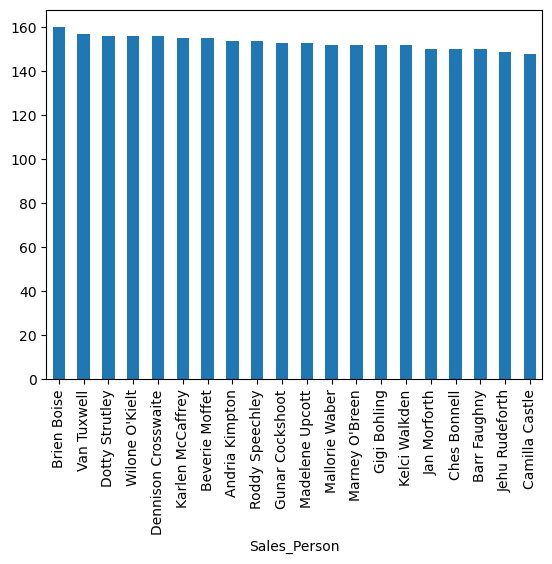

In [44]:
# Total 20 Sales Person with the highest sales
df["Sales_Person"].value_counts().sort_values(ascending=False).head(20).plot(kind="bar")

In [45]:
# Lets pick one of these Sales Person and see their behaviour
mask = (df["Sales_Person"] == "Gigi Bohling")

In [46]:
df[mask].head(2)

,Sales_Person,Product,Date,Amount,Boxes
Geography,,,,,
Canada,Gigi Bohling,50% Dark Bites,2021-01-07,10451,1307
New Zealand,Gigi Bohling,50% Dark Bites,2021-01-08,6797,486


In [47]:
df.loc[mask].head(2)

,Sales_Person,Product,Date,Amount,Boxes
Geography,,,,,
Canada,Gigi Bohling,50% Dark Bites,2021-01-07,10451,1307
New Zealand,Gigi Bohling,50% Dark Bites,2021-01-08,6797,486


In [48]:
df.loc[mask, "Sales_Person":"Boxes"].head(2)     # give me mask , but from colunm customer_id to currency

,Sales_Person,Product,Date,Amount,Boxes
Geography,,,,,
Canada,Gigi Bohling,50% Dark Bites,2021-01-07,10451,1307
New Zealand,Gigi Bohling,50% Dark Bites,2021-01-08,6797,486


In [49]:
df["Product"].unique()

array(['Raspberry Choco', 'White Choc', '99% Dark & Pure',
       "Baker's Choco Chips", 'Manuka Honey Choco', '85% Dark Bars',
       'Organic Choco Syrup', 'Caramel Stuffed Bars', 'Milk Bars',
       'Mint Chip Choco', 'Orange Choco', 'Eclairs', 'After Nines',
       'Spicy Special Slims', 'Drinking Coco', 'Peanut Butter Cubes',
       'Choco Coated Almonds', 'Fruit & Nut Bars', '50% Dark Bites',
       '70% Dark Bites', 'Almond Choco', 'Smooth Sliky Salty',
       'White-Choc', 'Manuka Honey Chocos'], dtype=object)

In [50]:
product_and_number_times_consumed = df["Product"].value_counts()
product_and_number_times_consumed

Product
99% Dark & Pure         179
Organic Choco Syrup     178
Peanut Butter Cubes     176
After Nines             175
Caramel Stuffed Bars    175
Orange Choco            175
85% Dark Bars           174
Raspberry Choco         173
Baker's Choco Chips     173
Choco Coated Almonds    172
Fruit & Nut Bars        172
Manuka Honey Choco      171
White Choc              171
Spicy Special Slims     171
Milk Bars               170
Eclairs                 170
50% Dark Bites          170
Smooth Sliky Salty      170
Mint Chip Choco         168
Almond Choco            168
Drinking Coco           167
70% Dark Bites          163
White-Choc                6
Manuka Honey Chocos       4
Name: count, dtype: int64

In [51]:
Best_Sales_Person = df["Sales_Person"].value_counts()
Best_Sales_Person

Sales_Person
Brien Boise            160
Van Tuxwell            157
Dotty Strutley         156
Wilone O'Kielt         156
Dennison Crosswaite    156
Karlen McCaffrey       155
Beverie Moffet         155
Andria Kimpton         154
Roddy Speechley        154
Gunar Cockshoot        153
Madelene Upcott        153
Kelci Walkden          152
Gigi Bohling           152
Marney O'Breen         152
Mallorie Waber         152
Jan Morforth           150
Ches Bonnell           150
Barr Faughny           150
Jehu Rudeforth         149
Camilla Castle         148
Rafaelita Blaksland    147
Husein Augar           146
Oby Sorrel             146
Curtice Advani         145
Kaine Padly            142
Ches Bonnell*            1
Name: count, dtype: int64

<Axes: xlabel='Product'>

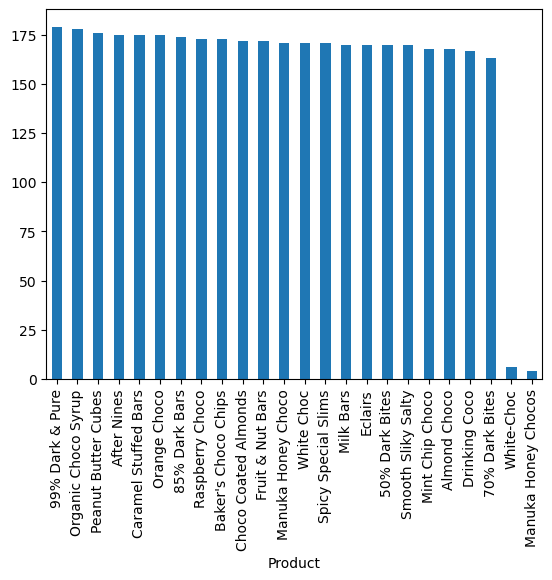

In [52]:
product_and_number_times_consumed.plot(kind="bar")

In [53]:
## Applying multiple filters....
# here we would be using the "&" and "|" operators...
# We have pickedout this particular Sales Person, and the successful transaction

mask = (df["Sales_Person"] == "Brien Boise ")
mask

Geography
New Zealand    False
Canada         False
USA            False
New Zealand    False
USA            False
               ...  
India          False
Australia      False
Australia      False
New Zealand    False
USA            False
Name: Sales_Person, Length: 3791, dtype: bool

In [54]:
mask2 = (df["Sales_Person"] == "Brien Boise ") & (df["Product"] == "99% Dark & Pure")
mask2

Geography
New Zealand    False
Canada         False
USA            False
New Zealand    False
USA            False
               ...  
India          False
Australia      False
Australia      False
New Zealand    False
USA            False
Length: 3791, dtype: bool

In [55]:
df.loc[mask2]

,Sales_Person,Product,Date,Amount,Boxes
Geography,,,,,


In [56]:
# # Performance of each products across all Locations
# pd.pivot_table(data = sales, values = 'Total Price', index = 'Product', columns = 'Geography', aggfunc = 'sum')